In [2]:
import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization
from spectral_cube import SpectralCube
import warnings
import pandas as pd

In [3]:
fn = '/Users/galagabits/Desktop/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
fh = SpectralCube.read(fn, format='casa_image')
cen = fh.shape[1]/2, fh.shape[2]/2

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh[0].header)

/Users/galagabits/opt/miniconda3/lib/python3.9/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [4]:
fn2 = '/Users/galagabits/Desktop/W51n_cont_briggsSC_tclean.image.fits'
fh2 = SpectralCube.read(fn2, format='fits')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww2 = WCS(fh2[0].header)

cen2 = fh2.shape[1]/2, fh2.shape[2]/2

In [7]:
def w51north_settings():

    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

In [22]:
#fh[cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105]

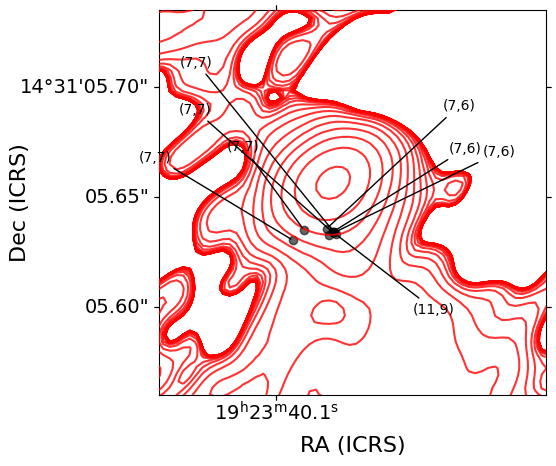

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(5,5))

ax = pl.subplot(projection=ww)

df = pd.read_csv('/Users/galagabits/Desktop/ammonia-3.csv')

w51north_settings()
# ax.annotate('(7,6)', (290.9170759, 14.518231700), arrowprops = dict(arrowstyle="->", transform=ww))
ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759-0.000015, 14.518231700+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,6)', (290.9170768, 14.51823206), xytext=(290.9170768-0.000015, 14.51823206+0.000015), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,6)', (290.9170765, 14.518231240), xytext=(290.9170765-0.00002, 14.518231240+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))

ax.annotate('(7,7)', (290.9170797, 14.51823187), xytext=(290.9170797+0.00001, 14.51823187+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,7)', (290.9170811, 14.51823057), xytext=(290.9170811+0.00002, 14.51823057+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,7)', (290.9170758, 14.51823158), xytext=(290.9170758+.00002, 14.51823158+0.000021), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,7)', (290.9170760, 14.5182316), xytext=(290.9170760+0.00002, 14.5182316+0.000015), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))

ax.annotate('(11,9)', (290.9170756, 14.51823135), xytext=(290.9170756-0.00001, 14.51823135-0.00001),
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))

#im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=99.95))
sc = ax.scatter(df.dec, df.ra, marker="o", transform=ax.get_transform('world'), color='black', alpha=0.6)
#cs = ax.contour(fh[0].data, levels=np.logspace(-3, 1, 20), alpha=0.8)
cs = ax.contour(fh2[0].data, levels=np.logspace(-10, 10, 80), alpha=0.8, colors='red',transform=ax.get_transform(ww2))


# cb = plt.colorbar(mappable=im)
# cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)


ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
#ax.text()
#ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759, 14.518231700), arrowprops = dict(arrowstyle="->"))

# cb.ax.tick_params(labelsize=14)
plt.show()

In [60]:
def maser_points_ax():
    transform = ax.get_transform('world')

    ax.errorbar(290.9170759, 14.518231700,  xerr=0.0000009592657155, yerr=0.0000009525078288,marker = 'o',  markersize=5, color='tab:cyan', transform=transform,label='(7,6)')
    ax.errorbar(290.9170768, 14.51823206,  xerr=0.000001154934128, yerr=0.000001147556912, marker = 'o', markersize=5, color='tab:cyan', transform=transform)
    ax.errorbar(290.9170765, 14.518231240,  xerr=0.000000935432323, yerr=0.0000009270761778, marker = 'o', markersize=5, color='tab:cyan', transform=transform)

    ax.errorbar(290.9170797, 14.51823187,  xerr=0.000002502666799, yerr=0.000002502605651,marker = 'o',  markersize=5, color='tab:pink', transform=transform,label='(7,7)')
    ax.errorbar(290.9170811, 14.51823057,  xerr=0.000003297782113, yerr=0.000003297622733,marker = 'o',  markersize=5, color='tab:pink', transform=transform)
    ax.errorbar(290.9170758, 14.51823158,  xerr=0.0000004803880607, yerr=0.0000004803625509,marker = 'o',  markersize=5, color='tab:pink', transform=transform)
    ax.errorbar(290.9170760, 14.5182316,  xerr=0.0000007257750809, yerr=0.0000007257355513, marker = 'o', markersize=5, color='tab:pink', transform=transform)

    ax.errorbar(290.9170756, 14.51823135,  xerr=0.0000007157208018, yerr=0.0000007151353273,marker = 'o',  markersize=5, color='tab:olive', transform=transform,label='(11,9)')

    ax.legend(title='NH3 (J,K)',fontsize = 16,title_fontsize=18)
    
    return

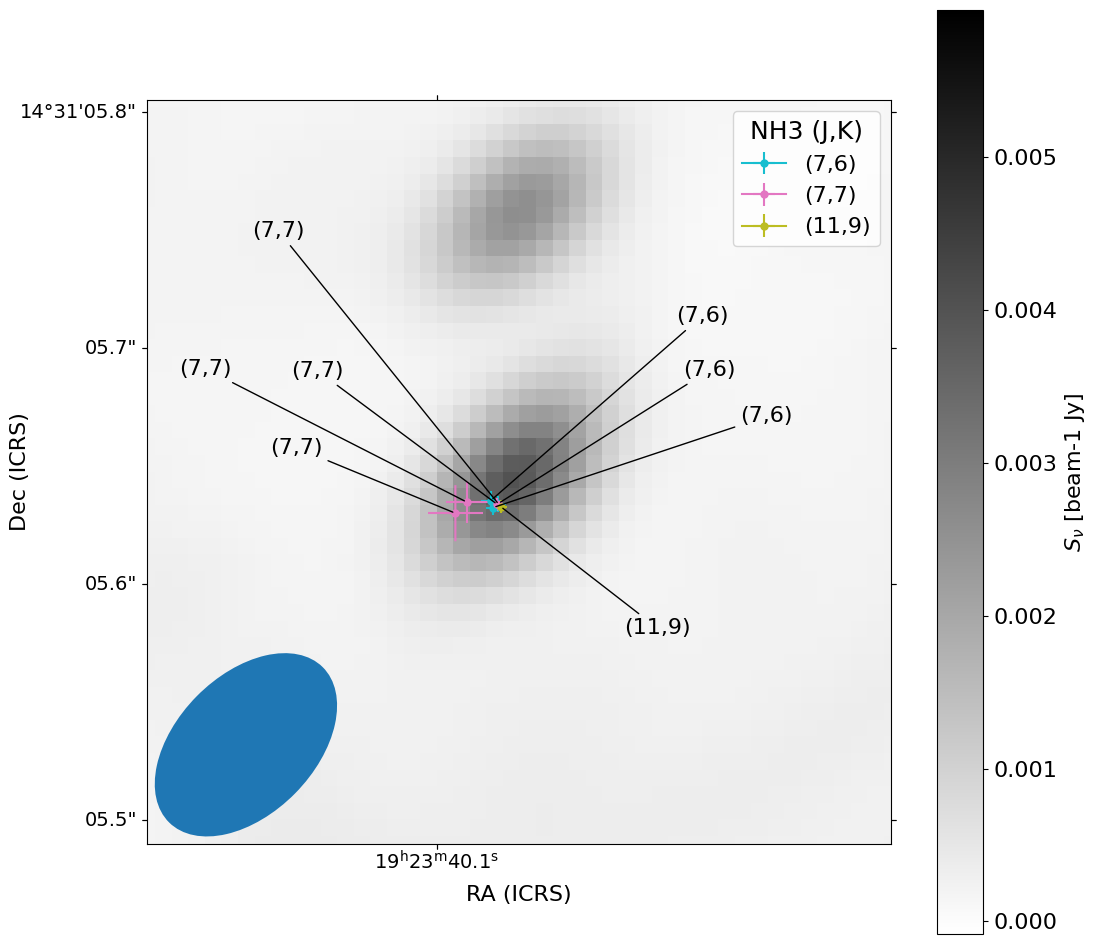

In [91]:
fig, ax = plt.subplots(figsize=(12,12))
ax = pl.subplot(projection=ww)
#ax = pl.subplot(projection=ww2)
#ax2 = pl.subplot(projection=ww)

w51north_settings()
maser_points_ax()

from radio_beam import Beam
import astropy.units as u
import matplotlib.pyplot as plt

my_beam = Beam.from_fits_header(fh[0].header) 
ycen_pix, xcen_pix = cen[0]+70 + 6, cen[1]-225 + 6
pixscale = 0.005 * u.arcsec
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
_ = ax.add_artist(ellipse_artist)  

ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759-0.0000225, 14.518231700+0.000015), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)
ax.annotate('(7,6)', (290.9170768, 14.51823206), xytext=(290.9170768-0.0000225, 14.51823206+0.000021), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)
ax.annotate('(7,6)', (290.9170765, 14.518231240), xytext=(290.9170765-0.00003, 14.518231240+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)

ax.annotate('(7,7)', (290.9170797, 14.51823187), xytext=(290.9170797+0.000035, 14.51823187+0.000015), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)
ax.annotate('(7,7)', (290.9170811, 14.51823057), xytext=(290.9170811+0.0000225, 14.51823057+0.000007), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)
ax.annotate('(7,7)', (290.9170758, 14.51823158), xytext=(290.9170758+.00003, 14.51823158+0.0000315), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)
ax.annotate('(7,7)', (290.9170760, 14.5182316), xytext=(290.9170760+0.000025, 14.5182316+0.000015), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)

ax.annotate('(11,9)', (290.9170756, 14.51823135), xytext=(290.9170756-0.000015, 14.51823135-0.000015),
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)



#sc = ax.scatter(df.dec, df.ra, marker="o", transform=ax.get_transform('world'), color='black', alpha=0.6)
# cs = ax.contour(fh[0].data, levels=np.logspace(-3, 4, 20), alpha=0.6, transform=ax.get_transform(ww), colors='red')
# cs2 = ax.contour(fh2[0].data, levels=np.logspace(-3, 4, 20), alpha=0.6, transform=ax.get_transform(ww2), colors='blue')
im = ax.imshow(fh[0].data, cmap='gray_r', norm=visualization.simple_norm(fh[0].data, stretch='linear', max_percent=99.9997))


ax.axis([cen[1]-225,cen[1]-180,cen[0]+70,cen[0]+115])
#ax.axis([cen2[1]-500,cen2[1]+500,cen2[0]-500,cen2[0]+500])
cb = plt.colorbar(mappable=im, ax=ax)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
cb.ax.tick_params(labelsize=16)
# ax.text(s='1 mm', y=1, x=1, color='blue', fontsize=18, weight='bold')
# ax.text(s='3 mm', y=14.51823135, x=290.9170756, color='red', fontsize=18, weight='bold')

plt.show()

In [92]:
def maser_points_ax():
    transform = ax.get_transform('world')

    ax.errorbar(290.9158956, 14.51800069, xerr=0.0000007744082441, yerr=0.0000007736500546,marker = 'o', elinewidth=1, markersize=5, c='tab:blue', transform=transform, label='(5,3)')
    ax.errorbar(290.9159260, 14.51800888, xerr=0.000001654344601, yerr=0.000001653913398,marker = 'o',  markersize=5, color='tab:blue' ,transform=transform)


    ax.errorbar(290.9159003, 14.51801042,  xerr=0.000002231605111, yerr=0.000002351250058,marker = 'o',  markersize=5, color='tab:orange', transform=transform,label='(6,2)')


    ax.errorbar(290.9158939, 14.51800111,  xerr=0.0000007096939545, yerr=0.0000007087442309,marker = 'o' , markersize=5, color='tab:green', transform=transform, label='(6,3)')
    ax.errorbar(290.9159262, 14.51800959,  xerr=0.0000009249558173, yerr=0.000001004686655, marker = 'o', markersize=5, color='tab:green', transform=transform)

    ax.errorbar(290.9158986, 14.51800816,  xerr=0.000001508011353, yerr=0.00000150789928, marker = 'o', markersize=5, color='tab:red', transform=transform,label='(7,4)')

    ax.errorbar(290.9158982, 14.51801105,  xerr=0.0000007282855144, yerr=0.000000725438108, marker = 'o', markersize=5, color='tab:purple', transform=transform,label='(7,5)')



    ax.errorbar(290.9158985, 14.51800926,  xerr=0.0000007257750809, yerr=0.000001031573272,marker = 'o',  markersize=5, color='tab:gray', transform=transform,label='(8,5)')

    ax.errorbar(290.9158975, 14.51800925,  xerr=0.000001251703102, yerr=0.000001251358726,marker = 'o',  markersize=5, color='tab:brown', transform=transform,label='(9,8)')





    ax.legend(title='NH3 (J,K)',fontsize = 16, title_fontsize=18)
    
    return

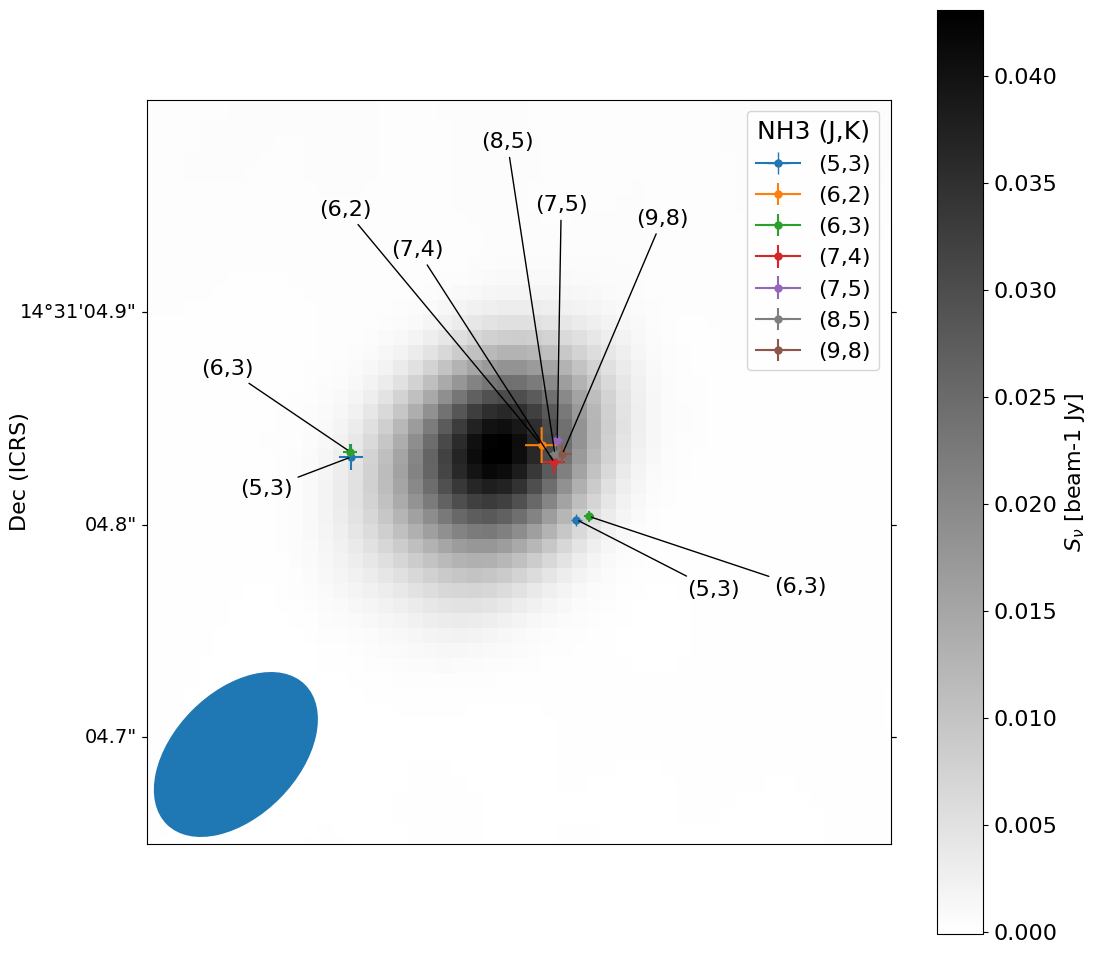

In [95]:
fig, ax = plt.subplots(figsize=(12,12))
ax = pl.subplot(projection=ww)
#ax = pl.subplot(projection=ww2)
#ax2 = pl.subplot(projection=ww)

w51north_settings()
maser_points_ax()

from radio_beam import Beam
import astropy.units as u
import matplotlib.pyplot as plt

my_beam = Beam.from_fits_header(fh[0].header) 
ycen_pix, xcen_pix =  cen[1]-50 + 6, cen[0]+355 + 6
pixscale = 0.005 * u.arcsec
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
_ = ax.add_artist(ellipse_artist)  

ax.annotate('(5,3)', (290.9158956, 14.51800069), xytext=(290.9158956-0.000015, 14.51800069-0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)
ax.annotate('(5,3)', (290.9159260, 14.51800888), xytext=(290.9159260+0.000015, 14.51800888-0.000005), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)

ax.annotate('(6,2)', (290.9159003, 14.51801042), xytext=(290.9159003+0.00003, 14.51801042+0.00003), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)

ax.annotate('(6,3)', (290.9158939, 14.51800111), xytext=(290.9158939-0.000025, 14.51800111-0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)
ax.annotate('(6,3)', (290.9159262, 14.51800959), xytext=(290.9159262+0.00002, 14.51800959+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)

ax.annotate('(7,4)', (290.9158986, 14.51800816), xytext=(290.9158986+0.000022, 14.51800816+0.000027), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)

ax.annotate('(7,5)', (290.9158982, 14.51801105), xytext=(290.9158982+0.000003, 14.51801105+0.00003), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)

ax.annotate('(8,5)', (290.9158985, 14.51800926), xytext=(290.9158985+.00001, 14.51800926+0.000040), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)

ax.annotate('(9,8)', (290.9158975, 14.51800925), xytext=(290.9158975-0.00001, 14.51800925+0.00003), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize = 16)



#sc = ax.scatter(df.dec, df.ra, marker="o", transform=ax.get_transform('world'), color='black', alpha=0.6)
# cs = ax.contour(fh[0].data, levels=np.logspace(-3, 4, 20), alpha=0.6, transform=ax.get_transform(ww), colors='red')
# cs2 = ax.contour(fh2[0].data, levels=np.logspace(-3, 4, 20), alpha=0.6, transform=ax.get_transform(ww2), colors='blue')
im = ax.imshow(fh[0].data, cmap='gray_r', norm=visualization.simple_norm(fh[0].data, stretch='linear', max_percent=100))


ax.axis([cen[0]+355,cen[0]+405,cen[1]-50,cen[1]-0])
#ax.axis([cen2[1]-500,cen2[1]+500,cen2[0]-500,cen2[0]+500])
cb = plt.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
cb.ax.tick_params(labelsize=16)
# ax.text(s='1 mm', y=1, x=1, color='blue', fontsize=18, weight='bold')
# ax.text(s='3 mm', y=14.51823135, x=290.9170756, color='red', fontsize=18, weight='bold')

plt.show()

In [26]:
def maser_points_ax():
    transform = ax.get_transform('world')
    
    ax.errorbar(290.9170756, 14.51823135,  xerr=0.0000007157208018, yerr=0.0000007151353273,marker = 'o',  markersize=5, color='tab:olive', transform=transform,label='(11,9)')
    ax.errorbar(290.916824, 14.51822272,  xerr=0.000001822484554, yerr=0.000001343610514,marker = 'o',  markersize=5, color='tab:olive', transform=transform)
    ax.errorbar(290.9169891, 14.51815923,  xerr=0.000003270723414, yerr=0.000003270495024,marker = 'o',  markersize=5, color='tab:olive', transform=transform)

    ax.legend(title='NH3 (J,K)',fontsize = 16, title_fontsize=18)
    
    return

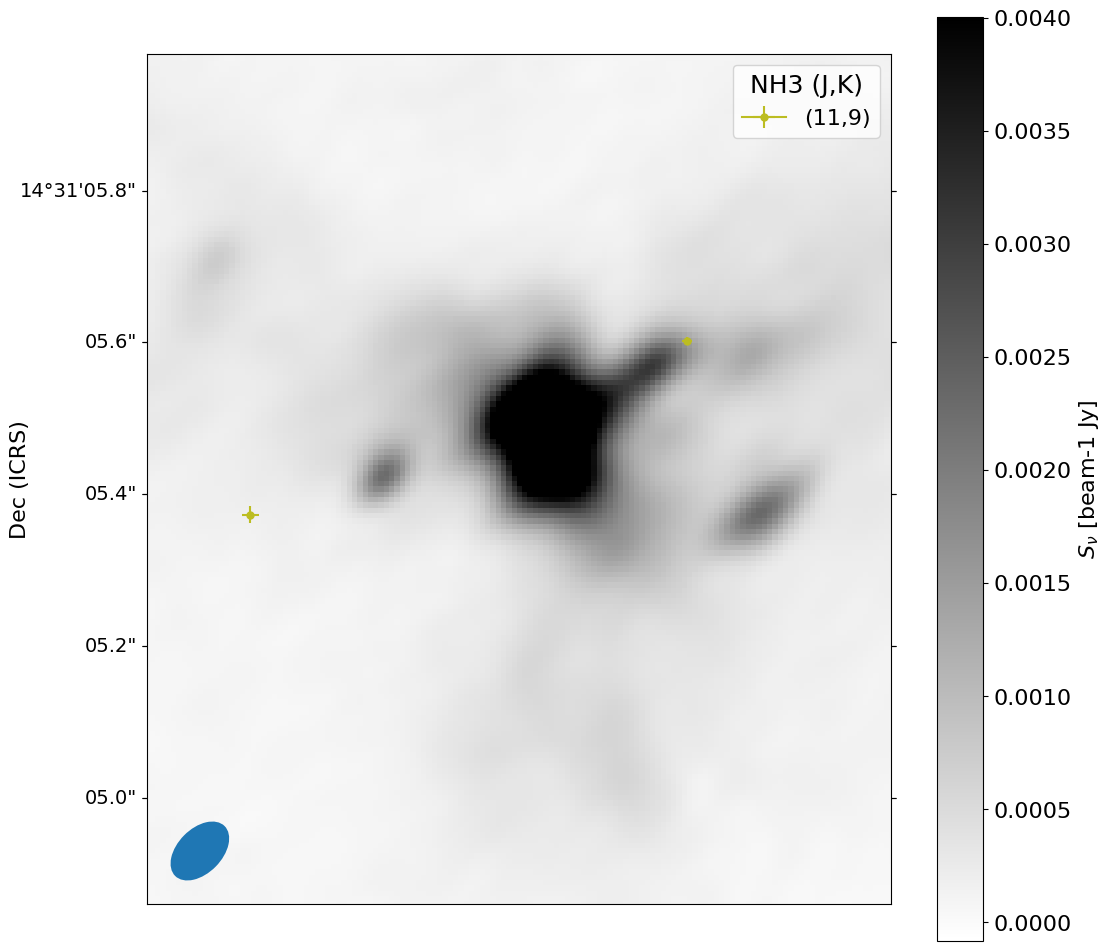

In [36]:
from radio_beam import Beam
import astropy.units as u
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
ax = pl.subplot(projection=ww)

w51north_settings()
maser_points_ax()

my_beam = Beam.from_fits_header(fh[0].header) 
ycen_pix, xcen_pix =  cen[1]-20 + 10, cen[0]-180 + 10
pixscale = 0.005 * u.arcsec
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
_ = ax.add_artist(ellipse_artist)  

im = ax.imshow(fh[0].data, cmap='gray_r', norm=visualization.simple_norm(fh[0].data, stretch='linear', max_percent=99.9995))

# cs = ax.contour(fh[0].data, levels=np.logspace(-3, 4, 20), alpha=0.6, transform=ax.get_transform(ww), colors='red')
# cs2 = ax.contour(fh2[0].data, levels=np.logspace(-3, 4, 20), alpha=0.6, transform=ax.get_transform(ww2), colors='blue')

ax.axis([cen[0]-180,cen[0]-40,cen[1]-20,cen[1]+140])
#ax.axis([cen2[1]-500,cen2[1]+500,cen2[0]-500,cen2[0]+500])

cb = plt.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
cb.ax.tick_params(labelsize=16)
# ax.text(s='1 mm', y=1, x=1, color='blue', fontsize=18, weight='bold')
# ax.text(s='3 mm', y=14.51823135, x=290.9170756, color='red', fontsize=18, weight='bold')

plt.show()

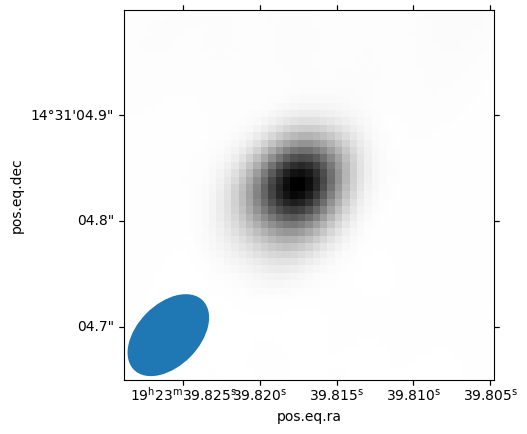

Beam: BMAJ=0.06605696678161621 arcsec BMIN=0.041816823184490204 arcsec BPA=-44.635887145996094 deg


In [46]:
from radio_beam import Beam
from astropy.io import fits
import matplotlib.pyplot as plt

my_beam = Beam.from_fits_header(fh[0].header) 
ycen_pix, xcen_pix =  cen[1]-50 + 6, cen[0]+355 + 6
pixscale = 0.005 * u.arcsec
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)

ax = pl.subplot(projection=ww)

im = ax.imshow(fh[0].data, cmap='gray_r', norm=visualization.simple_norm(fh[0].data, stretch='linear', max_percent=100))

_ = ax.add_artist(ellipse_artist)  

_ = ax.axis([cen[0]+355,cen[0]+405,cen[1]-50,cen[1]-0])
plt.show()

print(my_beam)  

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(5,5))

ax = pl.subplot(projection=ww2)

df = pd.read_csv('/Users/galagabits/Desktop/ammonia-3.csv')

w51north_settings()

ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759-0.000015, 14.518231700+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,6)', (290.9170768, 14.51823206), xytext=(290.9170768-0.000015, 14.51823206+0.000015), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,6)', (290.9170765, 14.518231240), xytext=(290.9170765-0.00002, 14.518231240+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))

ax.annotate('(7,7)', (290.9170797, 14.51823187), xytext=(290.9170797+0.00001, 14.51823187+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,7)', (290.9170811, 14.51823057), xytext=(290.9170811+0.00002, 14.51823057+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,7)', (290.9170758, 14.51823158), xytext=(290.9170758+.00002, 14.51823158+0.000021), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,7)', (290.9170760, 14.5182316), xytext=(290.9170760+0.00002, 14.5182316+0.000015), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))

ax.annotate('(11,9)', (290.9170756, 14.51823135), xytext=(290.9170756-0.00001, 14.51823135-0.00001),
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))

#im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=99.95))
sc = ax.scatter(df.dec, df.ra, marker="o", transform=ax.get_transform('world'), color='black', alpha=0.6)
#cs = ax.contour(fh[0].data, levels=np.logspace(-3, 1, 20), alpha=0.8)
cs = ax.contour(fh2[0].data, levels=np.logspace(-3, 1, 20), alpha=0.8, color='red')


# cb = plt.colorbar(mappable=im)
# cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)


ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
#ax.text()
#ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759, 14.518231700), arrowprops = dict(arrowstyle="->"))

# cb.ax.tick_params(labelsize=14)
plt.show()

KeyboardInterrupt: 

In [12]:
cs2 = ax.contour(fh2[0].data, levels=np.logspace(-3, 1, 80), alpha=0.8)